# Exploratory Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# importing CSV file to make DataFrame
from google.colab import files
uploaded = files.upload()

Saving healthy_lifestyle_city_2021(5).csv to healthy_lifestyle_city_2021(5).csv


In [ ]:
# imports CSV file and creates DataFrame using specified file
df_train2 = pd.read_csv("healthy_lifestyle_city_2021(5).csv")
df_train3 = pd.read_csv("healthy_lifestyle_city_2021(5).csv")
df_train4 = pd.read_csv("healthy_lifestyle_city_2021(5).csv")
df_train5 = pd.read_csv("healthy_lifestyle_city_2021(5).csv")

In [ ]:
# checking decoration of the file
df_train2.columns

Index(['City', 'Rank', 'Sunshine hours(City)',
       'Cost of a bottle of water(City)', 'Obesity levels(Country)',
       'Life expectancy(years) (Country)', 'Pollution(Index score) (City)',
       'Annual avg. hours worked', 'Happiness levels(Country)',
       'Outdoor activities(City)', 'Number of take out places(City)',
       'Cost of a monthly gym membership(City)'],
      dtype='object')

## A.) Show statitistics about selected DataSet

In [ ]:
# showing statistics of the data set 
df_train2.describe()

,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
count,44.000000,44.000000,44.000000,44.000000,44.00000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,22.500000,2194.818182,1.173409,0.219250,78.17500,49.960455,1254.681818,6.435000,213.977273,1443.113636,40.420000
std,12.845233,655.052431,0.718642,0.101957,5.30437,22.934285,748.970791,0.991202,127.190297,1388.803270,15.006457
min,1.000000,0.000000,0.150000,0.039000,56.30000,0.000000,0.000000,3.570000,23.000000,250.000000,16.070000
25%,11.750000,1747.500000,0.570000,0.195000,75.40000,30.010000,1035.000000,5.870000,125.250000,548.000000,31.310000
50%,22.500000,2066.000000,1.195000,0.223000,80.40000,50.980000,1570.000000,6.900000,189.500000,998.000000,37.330000
75%,33.250000,2626.500000,1.600000,0.290000,81.80000,66.350000,1773.750000,7.175000,288.250000,1674.250000,47.210000
max,44.000000,3542.000000,3.200000,0.362000,83.20000,91.740000,2137.000000,7.800000,585.000000,6417.000000,73.110000


## B.) Determine how the dependent variable and independent variables relate. Draw pair-wise scatter plots between the target and          correlated variables (based on your intuition). Draw the correlation matrix (heatmap style).

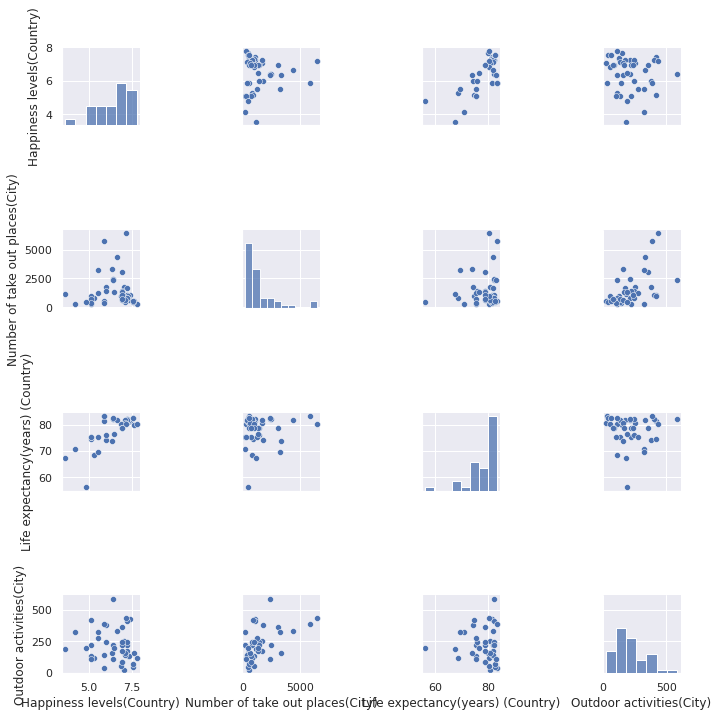

In [ ]:
# pair-wise scatterplot
sns.set()
cols = ['Happiness levels(Country)', 'Number of take out places(City)', 'Life expectancy(years) (Country)', 'Outdoor activities(City)']
sns.pairplot(df_train2[cols], size = 2.5)
plt.show();

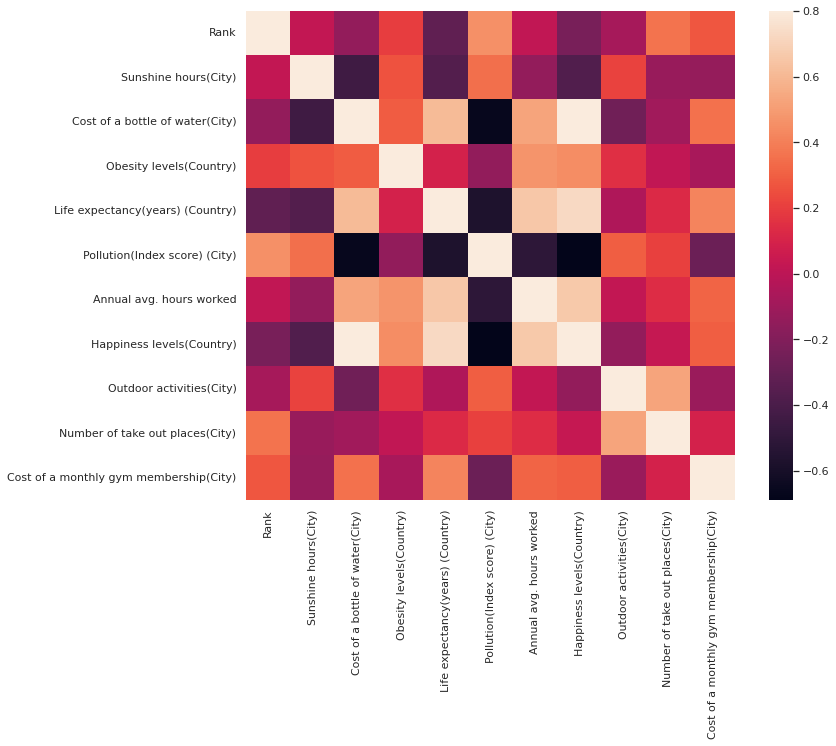

In [ ]:
# the correlation matrix
corrmat = df_train2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

## C.) Clean the dataset and handle the missing data, outliers, and categorical variables.



In [ ]:
# cleaning the dataset of missing data
total = df_train2.isnull().sum().sort_values(ascending=False)
percent = (df_train2.isnull().sum()/df_train2.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
City,0,0.0
Rank,0,0.0
Sunshine hours(City),0,0.0
Cost of a bottle of water(City),0,0.0
Obesity levels(Country),0,0.0
Life expectancy(years) (Country),0,0.0
Pollution(Index score) (City),0,0.0
Annual avg. hours worked,0,0.0
Happiness levels(Country),0,0.0
Outdoor activities(City),0,0.0


#  Predictive Model using Machine Learning 

## A) Split the dataset into training and test set.

In [ ]:
# splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split

df_train5.drop(['City'], axis=1, inplace=True)

X = df_train5.iloc[:, :-1].values
y = df_train5.iloc[:, 10].values

X_trainn, X_testt, y_trainn, y_testt = train_test_split(X, y, test_size=0.20, random_state=42)

## B) Apply four Machine learning Algorithms (Scikit-learn library) to your selected dataset.

In [ ]:
# Nearest Neighbor Algorithm

from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X, y_transformed)

KNeighborsClassifier()

In [ ]:
# Support Vector Machine Algortihm

# scikit-learn module consists od SVM package which has SVC object
from sklearn import svm

#Create a svm Classifier object
clfSVM = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clfSVM.fit(X, y_transformed)

SVC(kernel='linear')

In [ ]:
# Random Forest Model ALgroithm

#Import Random Forest Model from Scikit-learn ensemble package
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clfRFC=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clfRFC.fit(X,y_transformed)

RandomForestClassifier()

In [ ]:
# Import Linear regression module from scikit-learn linear-model package
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()

# Fit function is used to train out model on training set
linReg.fit(X, y_transformed)

LinearRegression()

## C) Find 10-fold cross-validation results in terms of AUC, MCC, and Balanced Accuracy metrics for classification or MAE and PCC metrics for regression on the training set. Select the best method based on CV results  and evaluate the performance on the test set.

In [ ]:
from sklearn.model_selection import cross_val_score

